<a href="https://colab.research.google.com/github/felipepizzinato/challenge-ia-2tdsph/blob/main/ml_model/ml_challenge_2tds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Carrega o CSV com as detecções
df = pd.read_csv('/content/resultado_placas (5).csv')

# Visualiza o que temos
print(df.columns)
print(df[['placa_combinada', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2']].head())


Index(['arquivo', 'moto_id', 'placas', 'placa_combinada', 'bbox_x1', 'bbox_y1',
       'bbox_x2', 'bbox_y2'],
      dtype='object')
    placa_combinada  bbox_x1  bbox_y1  bbox_x2  bbox_y2
0           GDT2086      234        1      972      577
1     ORTBYX2091086      814        0     1193      402
2  Não identificado        1       90      338      720
3  Não identificada     1406        0     1599      197
4  Não identificado        0      849      133     1037


In [3]:
import numpy as np

def contar_letras_digitos(placa):
    if placa == "Não identificada" or pd.isna(placa):
        return (0, 0)
    letras = sum(c.isalpha() for c in placa)
    digitos = sum(c.isdigit() for c in placa)
    return letras, digitos

# Tamanho da placa
df['placa_len'] = df['placa_combinada'].fillna('').apply(len)

# Letras e dígitos
df[['n_letras', 'n_digitos']] = df['placa_combinada'].fillna('').apply(lambda p: pd.Series(contar_letras_digitos(p)))

# Tamanho do bounding box
df['bbox_area'] = (df['bbox_x2'] - df['bbox_x1']) * (df['bbox_y2'] - df['bbox_y1'])


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

# Selecionar as features
features = df[['placa_len', 'n_letras', 'n_digitos', 'bbox_area']]

# Normalizar as features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar o KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['grupo_placa'] = kmeans.fit_predict(features_scaled)

joblib.dump(kmeans, 'modelo_kmeans_placas.pkl')
joblib.dump(scaler, 'scaler_kmeans.pkl')



['scaler_kmeans.pkl']

In [5]:
df[df['grupo_placa'] == 0]

,arquivo,moto_id,placas,placa_combinada,bbox_x1,bbox_y1,bbox_x2,bbox_y2,placa_len,n_letras,n_digitos,bbox_area,grupo_placa
2,WhatsApp Image 2025-05-15 at 22.57.05.jpeg,2,['Não identificado'],Não identificado,1,90,338,720,16,15,0,212310,0
3,WhatsApp Image 2025-05-15 at 22.57.05.jpeg,3,"['0', '54', 'C0', '9']",Não identificada,1406,0,1599,197,16,0,0,38021,0
4,WhatsApp Image 2025-05-15 at 22.57.06.jpeg,2,['Não identificado'],Não identificado,0,849,133,1037,16,15,0,25004,0
5,WhatsApp Image 2025-05-15 at 22.57.06.jpeg,2,['Não identificado'],Não identificado,254,754,368,908,16,15,0,17556,0
6,WhatsApp Image 2025-05-15 at 22.57.06.jpeg,2,['Não identificado'],Não identificado,0,936,51,1114,16,15,0,9078,0
7,WhatsApp Image 2025-05-15 at 22.57.06.jpeg,2,['Não identificado'],Não identificado,160,751,286,905,16,15,0,19404,0
8,WhatsApp Image 2025-05-15 at 22.57.06.jpeg,2,['Não identificado'],Não identificado,116,783,238,934,16,15,0,18422,0
9,WhatsApp Image 2025-05-15 at 22.57.08.jpeg,4,['90I0'],Não identificada,817,219,989,444,16,0,0,38700,0
10,WhatsApp Image 2025-05-15 at 22.57.08.jpeg,5,['II2'],Não identificada,586,239,777,459,16,0,0,42020,0
12,WhatsApp Image 2025-05-15 at 22.57.08.jpeg,7,['2J98'],Não identificada,674,236,842,453,16,0,0,36456,0


In [6]:
df[df['grupo_placa'] == 1]

,arquivo,moto_id,placas,placa_combinada,bbox_x1,bbox_y1,bbox_x2,bbox_y2,placa_len,n_letras,n_digitos,bbox_area,grupo_placa
1,WhatsApp Image 2025-05-15 at 22.57.05.jpeg,1,"['EF', 'ORT', 'DT', 'BYX', '2091', '086']",ORTBYX2091086,814,0,1193,402,13,6,7,152358,1
11,WhatsApp Image 2025-05-15 at 22.57.08.jpeg,6,"['GBE', 'BF84']",GBEBF84,971,253,1204,610,7,5,2,83181,1


In [7]:
df[df['grupo_placa'] == 2]

,arquivo,moto_id,placas,placa_combinada,bbox_x1,bbox_y1,bbox_x2,bbox_y2,placa_len,n_letras,n_digitos,bbox_area,grupo_placa
0,WhatsApp Image 2025-05-15 at 22.57.05.jpeg,0,"['GDT', '2086']",GDT2086,234,1,972,577,7,3,4,425088,2


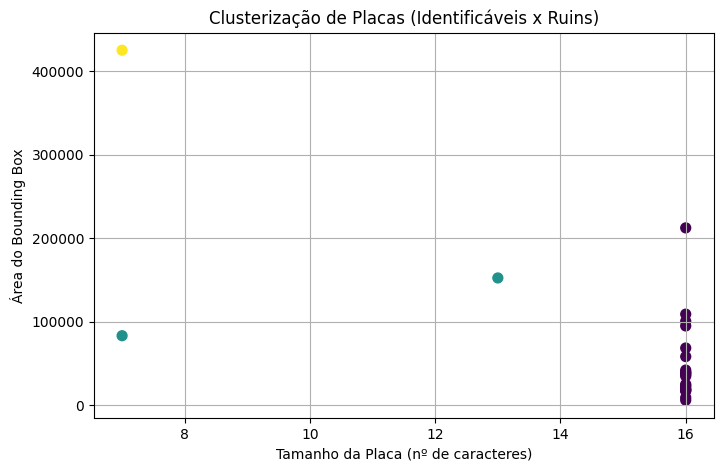

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['placa_len'], df['bbox_area'], c=df['grupo_placa'], cmap='viridis', s=50)
plt.xlabel('Tamanho da Placa (nº de caracteres)')
plt.ylabel('Área do Bounding Box')
plt.title('Clusterização de Placas (Identificáveis x Ruins)')
plt.grid(True)
plt.show()
